# OpAmp 2: Giratore

**Informazioni generali.** Misure e caratterizzazioni di un circuito giratore come amplificazione dell'amplificatore operazionale

Dettagli del setup:
* Circuito giratore come rimpiazzo di induttore in HPF RLC
* Realizzazione di oscillatore risonante e miglioramento del fattore di qualità Q
* Realizzazione di filtro notch con OpAmp agente da compontente passivo

## Analisi matematica del circuito

Si osserva facilmente come l'operazionale agisca da buffer grazie al collegamento diretto( $\beta = 1$) in feedback tra uscita e ingresso negativo, ciò fa in modo che si possa dividere il circuito in due rami, considerando come, secondo le regole d'oro, la corrente in ingresso all'amplificatore sia trascurabile.
Di conseguenza si ottengono due rami, uno che dall'ingresso, tramite la resistenza R2, arriva all'uscita dell'integrato e uno che, attraverso C1 e R1, termina a massa.

Si può ora dunque immaginare di iniettare una corrente $i_{in}$ al circuito e si avrà che questa si dividerà tra i due rami e si otterra una tensione $v_{in} = \frac{v_{in} - v_o}{R2} + \frac{v_{in}}{R_1+\frac{1}{j\omega C}} $, notando come 
$ v_o = v_{in} \frac{j\omega R_1 C}{1 + j\omega R1 C} $ da un partitore di tensione tra $Z_C$ e $R_1$ si vede facilmente come 

$$ 

i_{in} = \frac{ v_{in} (1 - \frac{j\omega R_1 C}{1 + j\omega R1 C} )}{R_2} + v_{in}\frac{ j\omega C }{1 + j\omega C R1} \implies

\frac{i_{in}}{v_{in}} = \frac{1}{R_{2}} \left( 1 - \frac{j\omega  R_1 C}{1 + j\omega R_1 C} \right) = \frac{1}{R_2} \left(  \frac{1 + j\omega R1 C - j\omega R_1 C (R_2 - 1)}{1+j\omega R_1 C}      \right) \implies
$$
$$
\implies Z_{eq} = \frac{v_{in}}{i_{in}} = \frac{ R_2 + j\omega R_1 R_2 C}{1 - j\omega R_1 R_2 C} \rightarrow

$$


Leggendo il datasheet del primo operazionale, AD8031, si osserva un guadagno ad anello aperto e resistenza di ingresso differenziale riportate di seguito


| Componente | Misura |
| :-: | :-: |
| $ R_i $ | $ 280 \, k\Omega $ |
| A | $ 80 \, dB $ |
| $ V_{off} $ | $ \pm 1 \frac{\cdot}{\cdot} \pm 6 \,\, mV $ |
| $ I_{bias} $ | $ 0.45 \frac{\cdot}{\cdot} 1.2 \, \mu A $ |
| CMRR | $ 60 \frac{\cdot}{\cdot} 80 \, dB $ |
| CMIR | $ 40 M\Omega $ |

CMRR = Common Mode Rejection Ratio

CMIR = Common Mode Input Resistance


Regolata ampiezza con partitore ~1/3

No offset visibile da fit dati, Vo~=0.4 uV, trascurabile





## Amplificatore Invertente

Una volta effettuate le misure preliminari si è iniziato assemblando un circuito amplificatore non invertente coi resistori prima misurati, scelti in maniera tale da fornire un guadagno teorico il più simile possibile a 10, sfruttando l'espressione del guadagno ottenuta risolvendo il circuito tramite le "regole d'oro" degli OpAmp ossia $ G = -\frac{R2}{R1} $.
Calcolando con i valori misurati si ottiene un realtà un guadagno da modello pari a $ G = -10.02 \pm 0.05 $, compatibile con -10 ma non esatto, come aspettato da un circuito reale.

Assemblato il circuito lo si è eccitato con varie diverse forme d'onda a diverse ampiezze in maniera tale da osservarne il comportamento, specialmente con idea di osservare, senza misura, il meccanismo della saturazione.
Sono state ad ogni modo effettuate prese dati su segnali non distoti o saturati in maniera tale da poter misurare il guadagno del circuito tramite quoziente tra le ampiezze di uscita e ingresso.





0


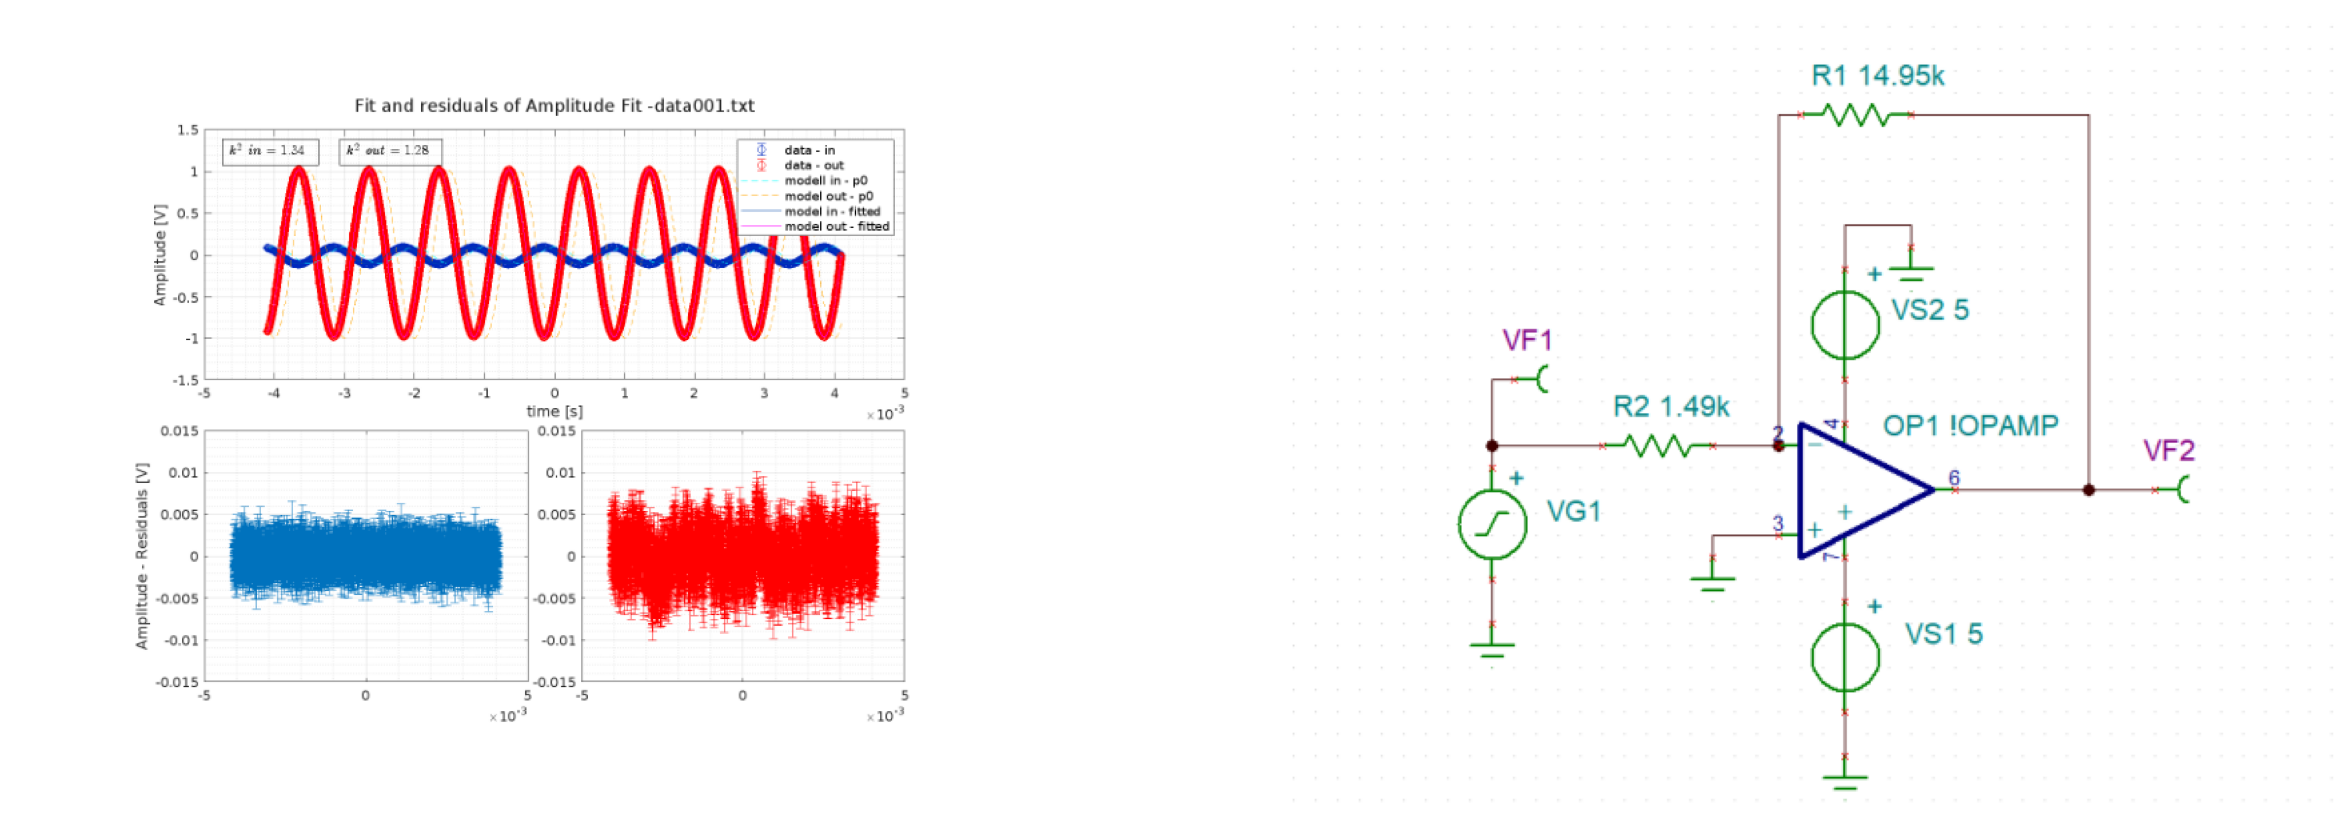

In [10]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 15), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            axes[i].imshow(imgList[i])
            axes[i].axis('off')
        else:
            for j in range(cols):
                axes[i][j].imshow(imgList[i*cols+j])
                axes[i][j].axis('off')
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/fitplot/fitdata001.pdf', 'Media/simulation/invertente.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


0


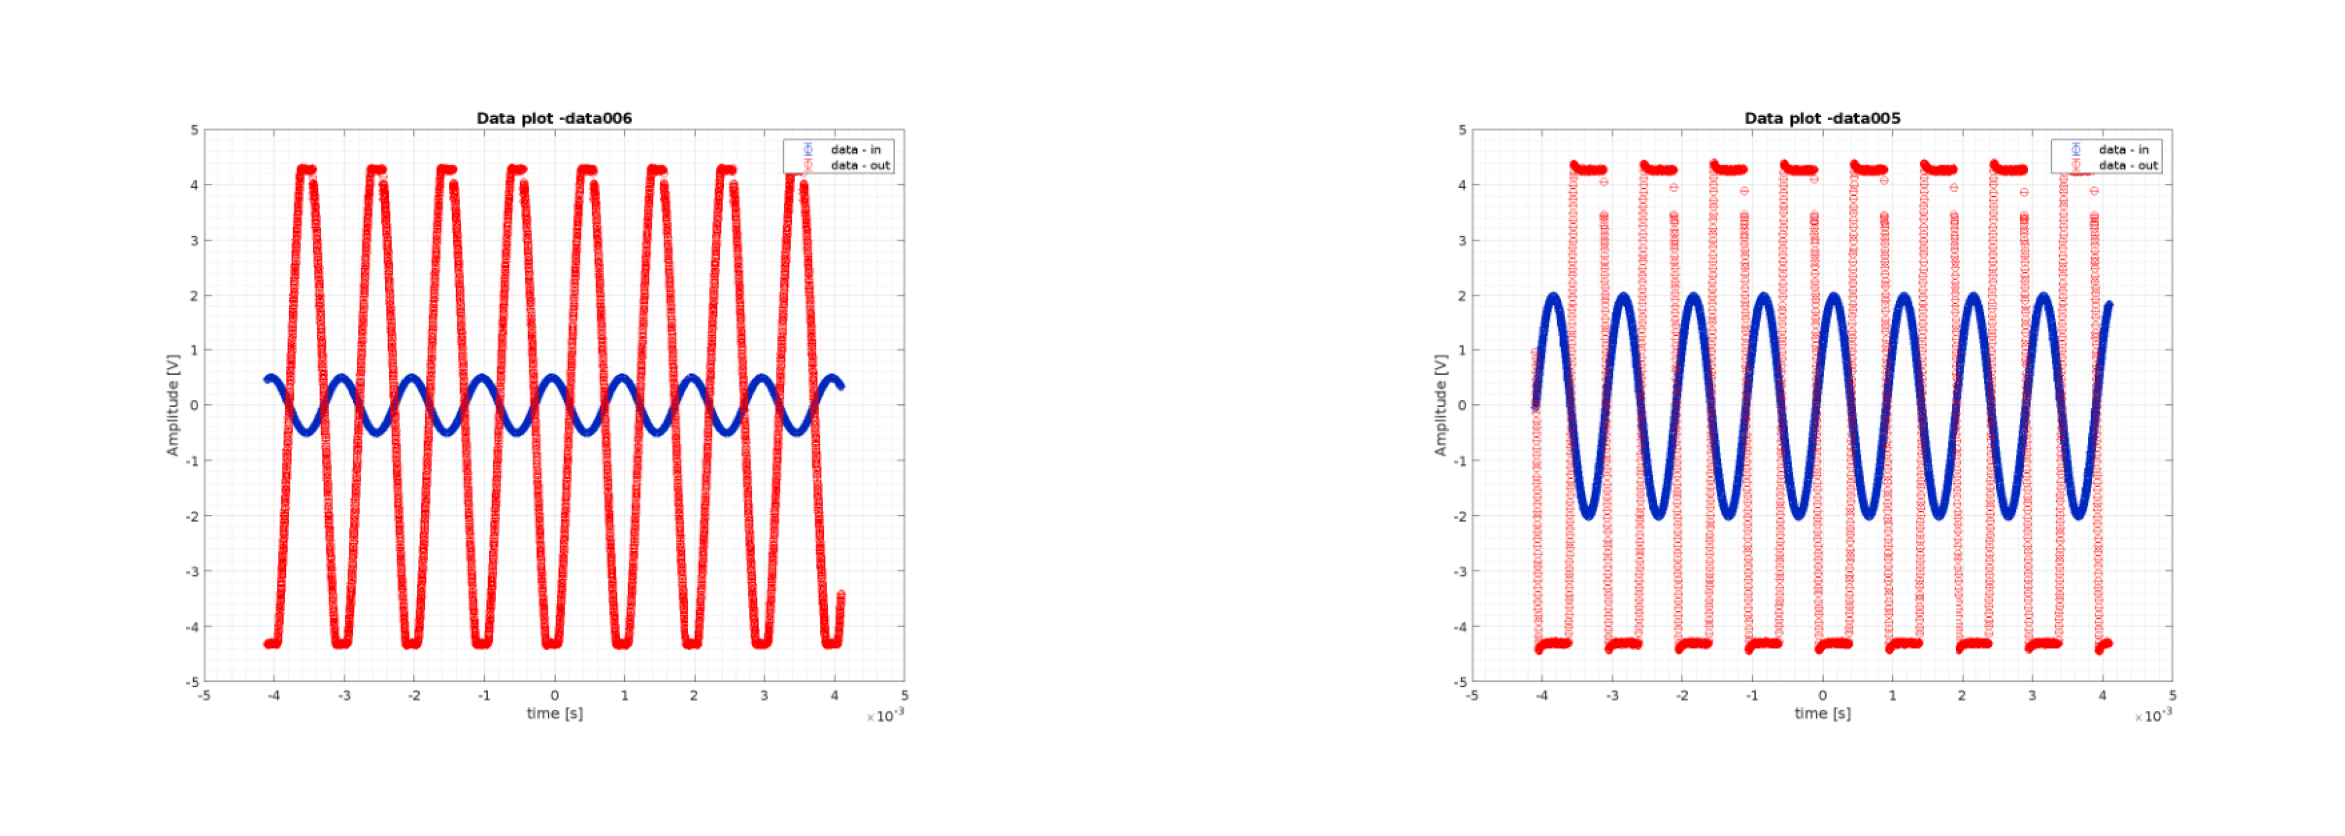

In [11]:
pdfList = ['Media/fitplot/plotdata006.pdf', 'Media/fitplot/plotdata005.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

Dall'analisi dei dati si ottiene un guadagno tramite rapporto tra le ampiezze pari a $ G_{fit} = -10.0119 \pm 0.002 $, compatibile entro un $ \sigma $ con il valore teorico.

## Amplificatore Non Invertente
Allo stesso modo sono state effettuate misure equivalenti dopo averi riconnesso il circuito come amplificatore invertente, in maniera tale da ottenere un'uscita in fase con l'ingresso, invece in ritardo di $ \pi \, rad $  come avveniva con lìamplificatore invertente, ma con guadagno nominale oramai di $ 11 = 1 + R2/R1 $.
Anche in questo caso le misure portano a $ G = 11.02 \pm 0.05 $, ancora una volta compatibile ma non esatto col valore nominale.

0


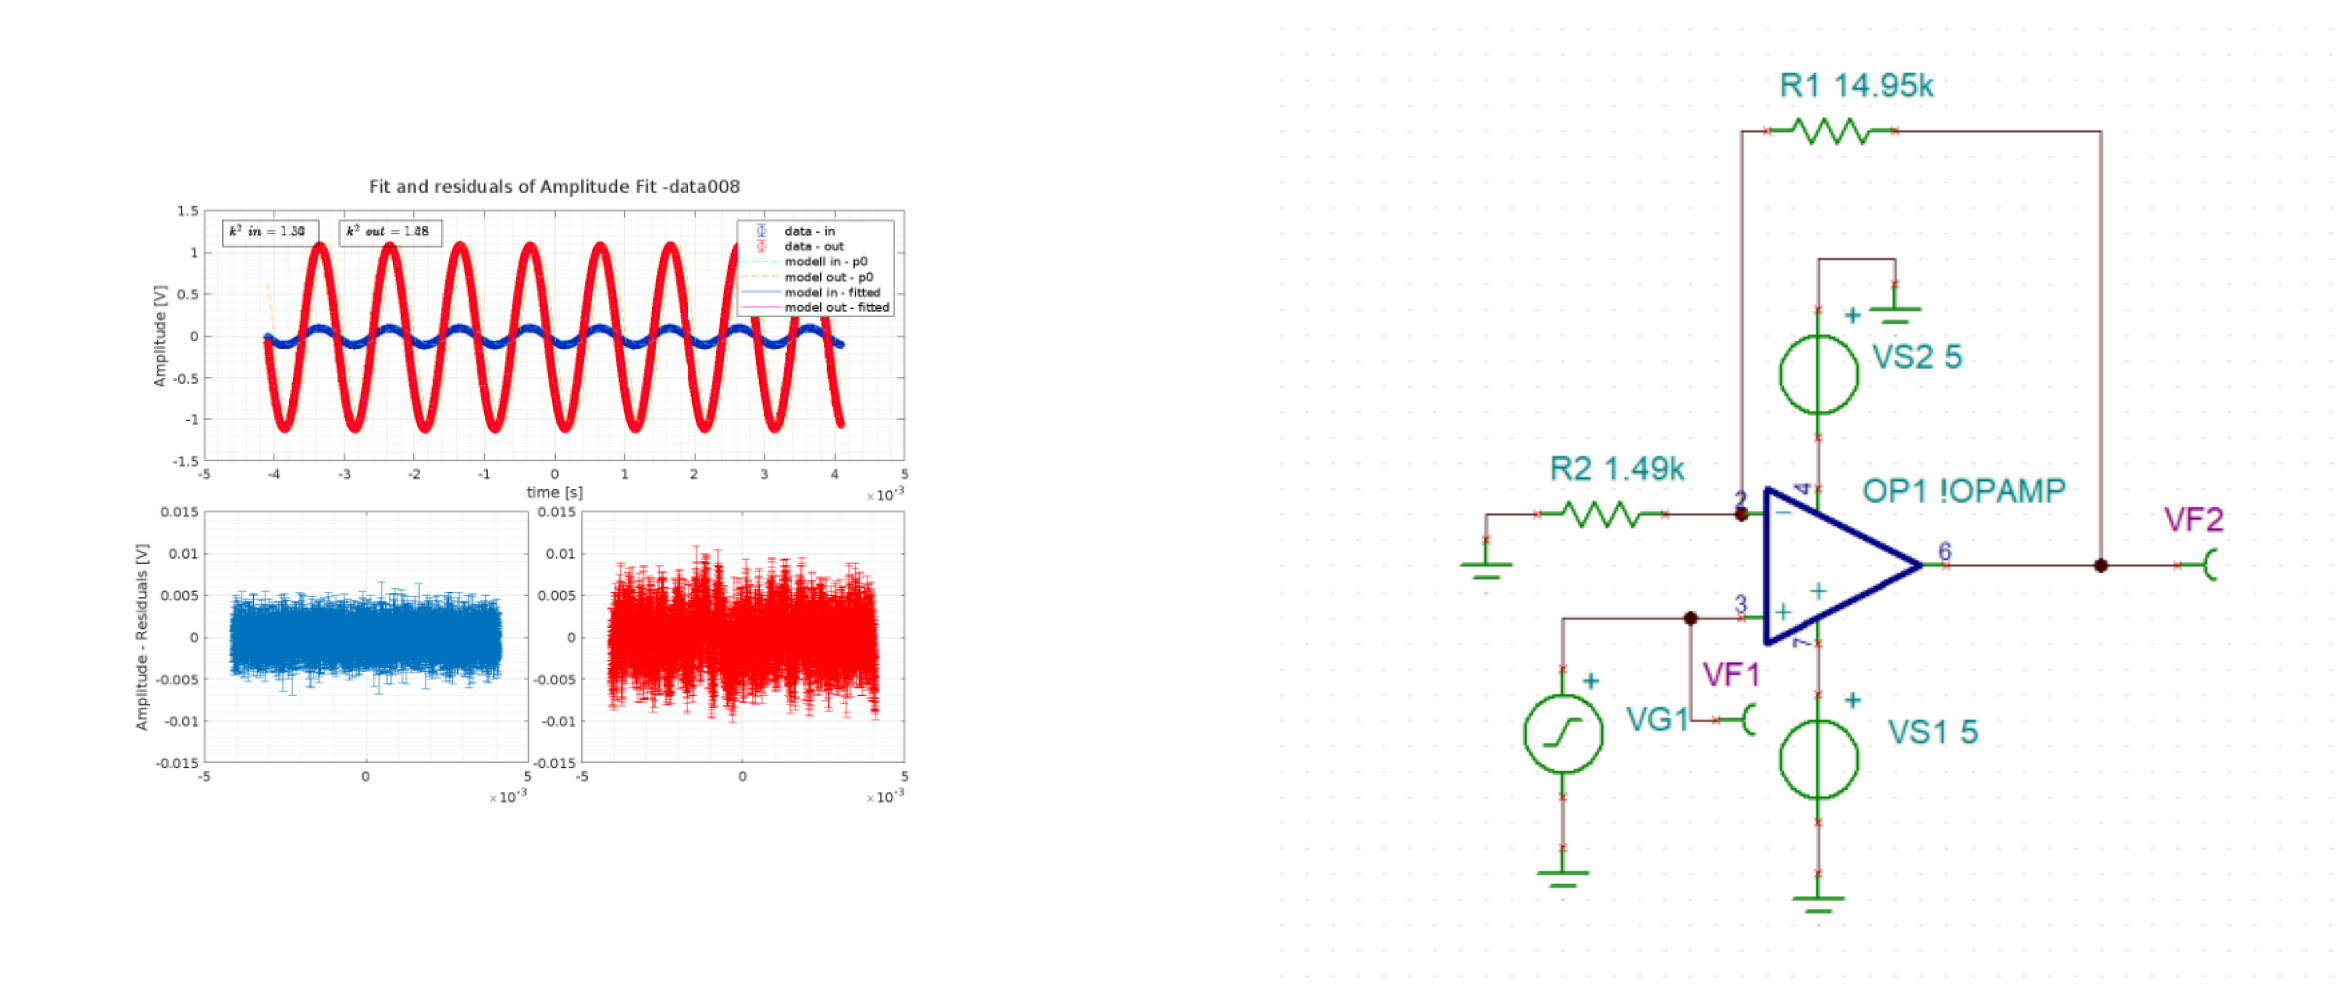

In [3]:
pdfList = ['Media/fitplot/fitdata008.pdf', 'Media/simulation/nonInvertente.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)

0


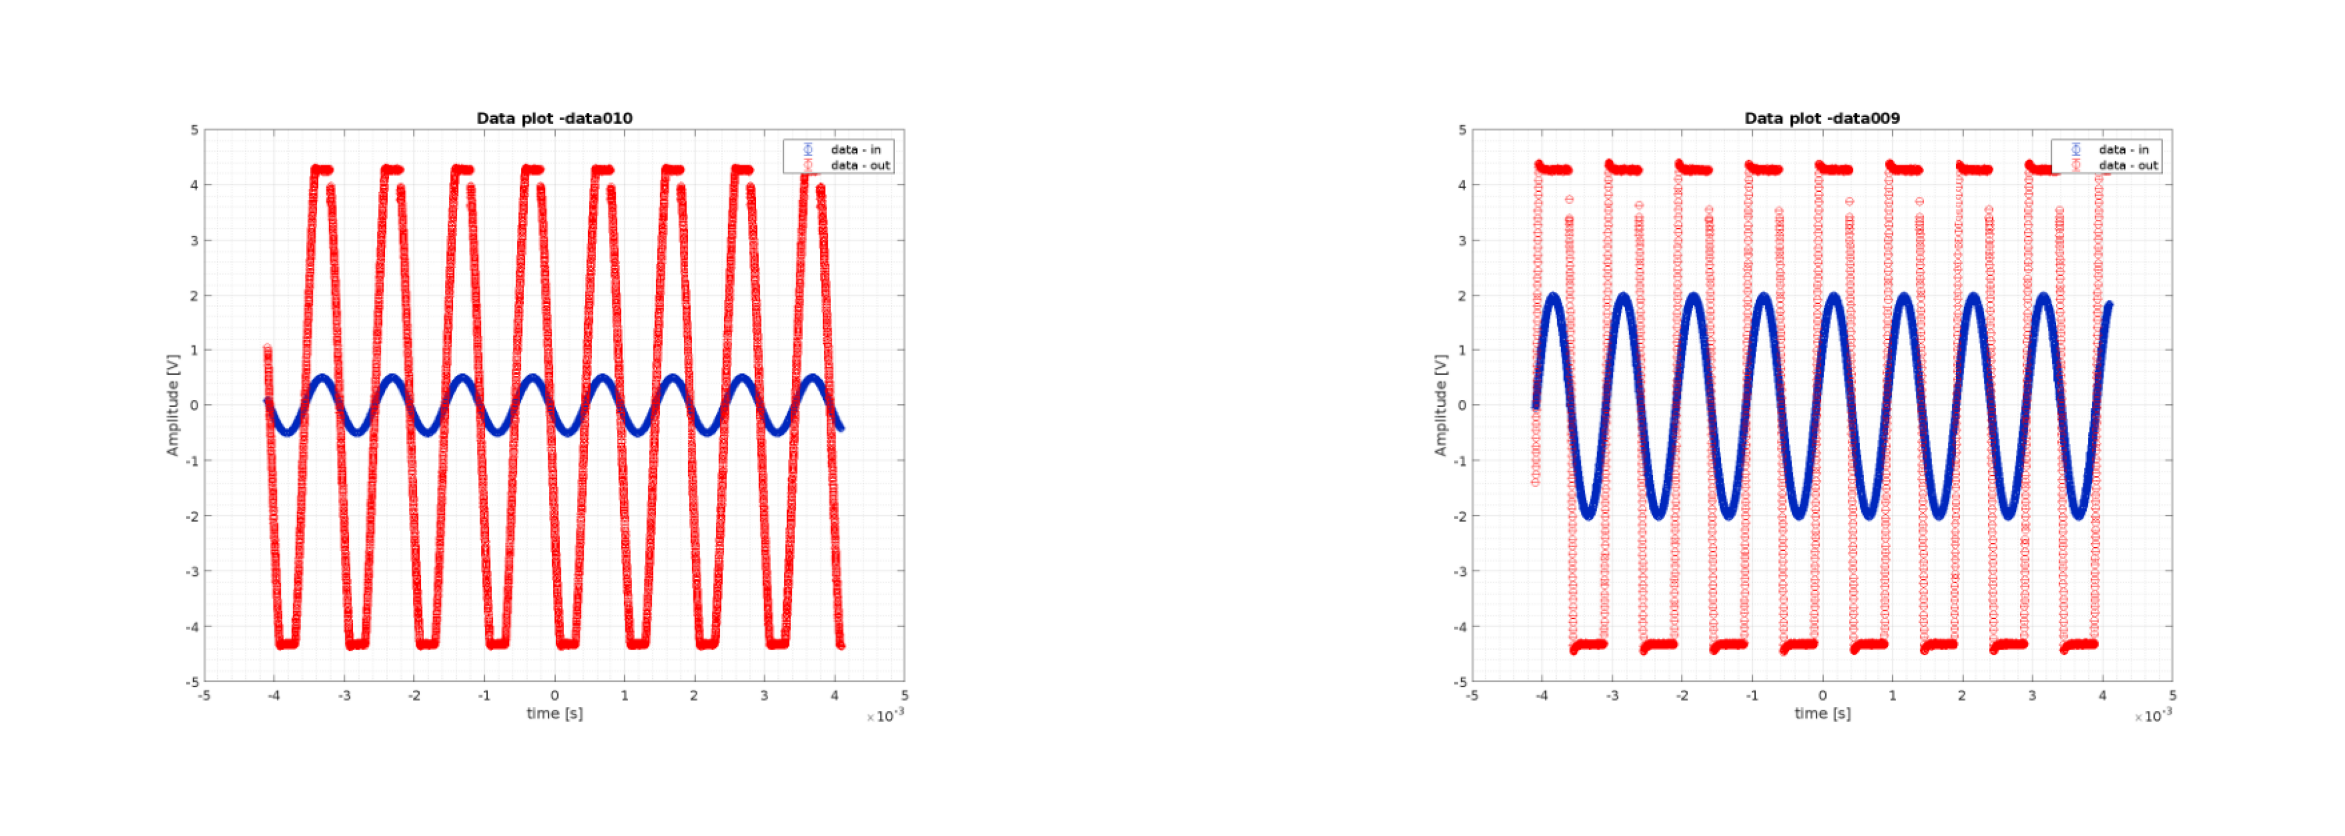

In [13]:
pdfList = ['Media/fitplot/plotdata010.pdf', 'Media/fitplot/plotdata009.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

Anche in questo caso il fuadagno ottenuto dal fit, $ G_{fit} = 11.016 \pm 0.002 $, è direttamente compatibile con il valore teorico.

## Buffer
Una volta prese queste misure, con l'obiettivo di utilizzare il dispositivo OpAmp in configurazione buffer per disaccoppiare le due parti di un filtro passa banda CRRC, sfruttando dunque l'elevata resistenza d'ingresso, nominalmente $25 M\Omega $ secondo datasheet, e la trascurabile resistenza d'uscita.

Tuttavia, nel corso di prendere misure preliminare per assicurarsi la funzione di trasferimento fosse quanto più possibile simile a una costante moltiplicativa 1 per tutta la banda passannte dell'amplificatore, nominalmente pari a $ 400-600 kHz $, si è osservato un grosso dip nel guadagno per frequenze maggiori di $ 10kHz $, comportamento che avrebbe reso impossibile il funzionamento corretto del filtro.

Dopo una discussione col professor Roddaro si è ipotizzato il comportamento potrebbe essere dovuto dalla bassa alimentazione usata, in quanto OP77, l'integrato in uso, presenta nel datasheet solo caratteristiche misurate per un'alimentazione a $ \pm 15V$, si è dunque scelto di prendere misure a varie alimentazioni in maniera tale da poter osservare, fosse stata presente, alcuna modulazione della banda passante in funzione della tensione di alimentazione.

Le misure, riportate successivamente, tuttavia presentano una situazione alquanto diversa, nominalmente una mancanza di qualsiasi correlazione tra banda passante e alimentazione, quest'ultima tuttavia pare avere effetto sul modo in cui il segnale in ingresso viene distorno, seppur non sulla quantità di questa distorsione.

Siamo dunque dell'opinione che l'integrato scelto non sia in grado di essere utilizzato per lo scopo posto in precedenza.


Trovandosi però in aula un integrato $ AD8031 $ si è scelto di fare misure di quest'ultimo per ottenere un'indicazione della funzione di trasferimento del circuito buffer con esso assemblato, e si è osservata una quantità di distorsione nel segnale trascurabile sinio a frequenze vicine a $ 10^6 Hz$, compatibile con la banda passante pubblicizzata di $ 80 MHz$.
Si osserva tuttavia una grande quantità di rumore nel segnale in uscita, artefatto dovuto alla presenza di un forte fattore moltiplicativo, nominalmente $ 80 \, dB $ ad alimentazione $ \pm 5 \, V $, il quale è necessario per il funzionamento con bassi segnali, ma porta appunto a una buona quantità di rumore.

0
1


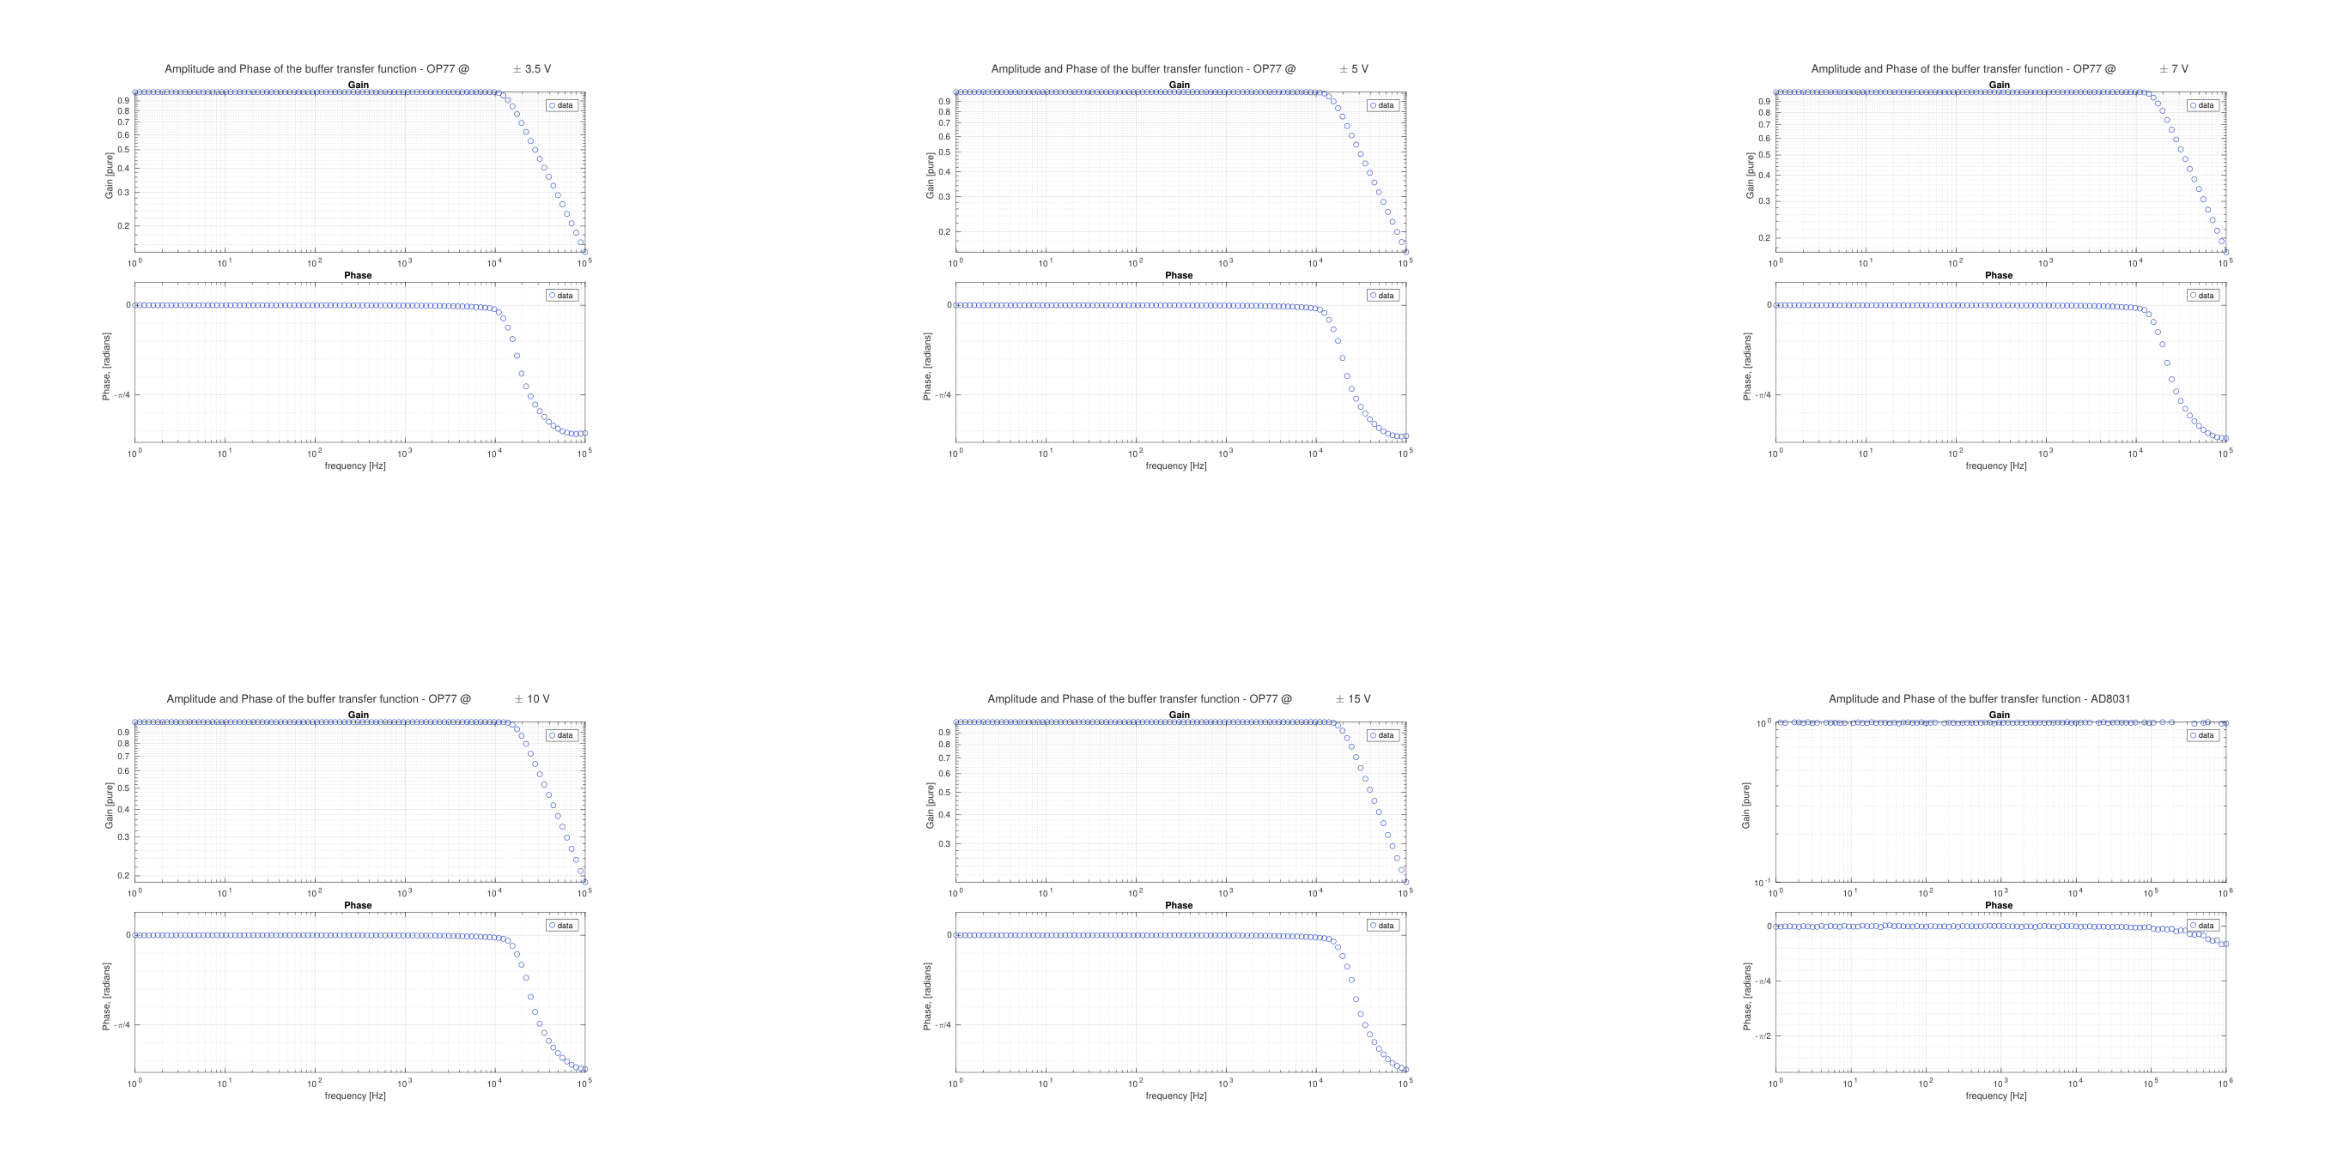

In [4]:
cols = 3
rows = 2
pdfList = ['Media/bodePlots/bodeOP77-3.5.pdf', 'Media/bodePlots/bodeOP77-5.pdf', 'Media/bodePlots/bodeOP77-7.pdf', 'Media/bodePlots/bodeOP77-10.pdf', 'Media/bodePlots/bodeOP77-15.pdf', 'Media/bodePlots/bodeAD8031.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)

## Passa Banda
Appare ovvio dalle funzioni di trasferimento dei buffer che assemblare un filtro passa banda in stile CRRC, dunque un passa banda di primo ordine, sfruttando un buffer realizzato tramite OP77 risulterebbe poco utile, in quanto a meno che non si prepari il circuito per funzionare a frequenze inferiori ai ~10 $ kHz $ si otterrebe una banda discendete dominata più dal buffer che non dal filtro stesso.

Tuttavia anche realizzare il circuito tramite AD8031 presenta problemi, come si vedrà nei grafici delle funzioni di trasferimento.
Nonostante non sia ben nota l'origine di questa variazione dalla funzione calcolata, si crede sia dovuto a effetti di secondo ordine dovute a capacità interne all'operazionale, le quali sono note essere non trascurabili, le quali si accoppiano al circuito per alte frequenze, mentre per frequenze basse si osserva un comportamento tipico di un HPF CR.

0


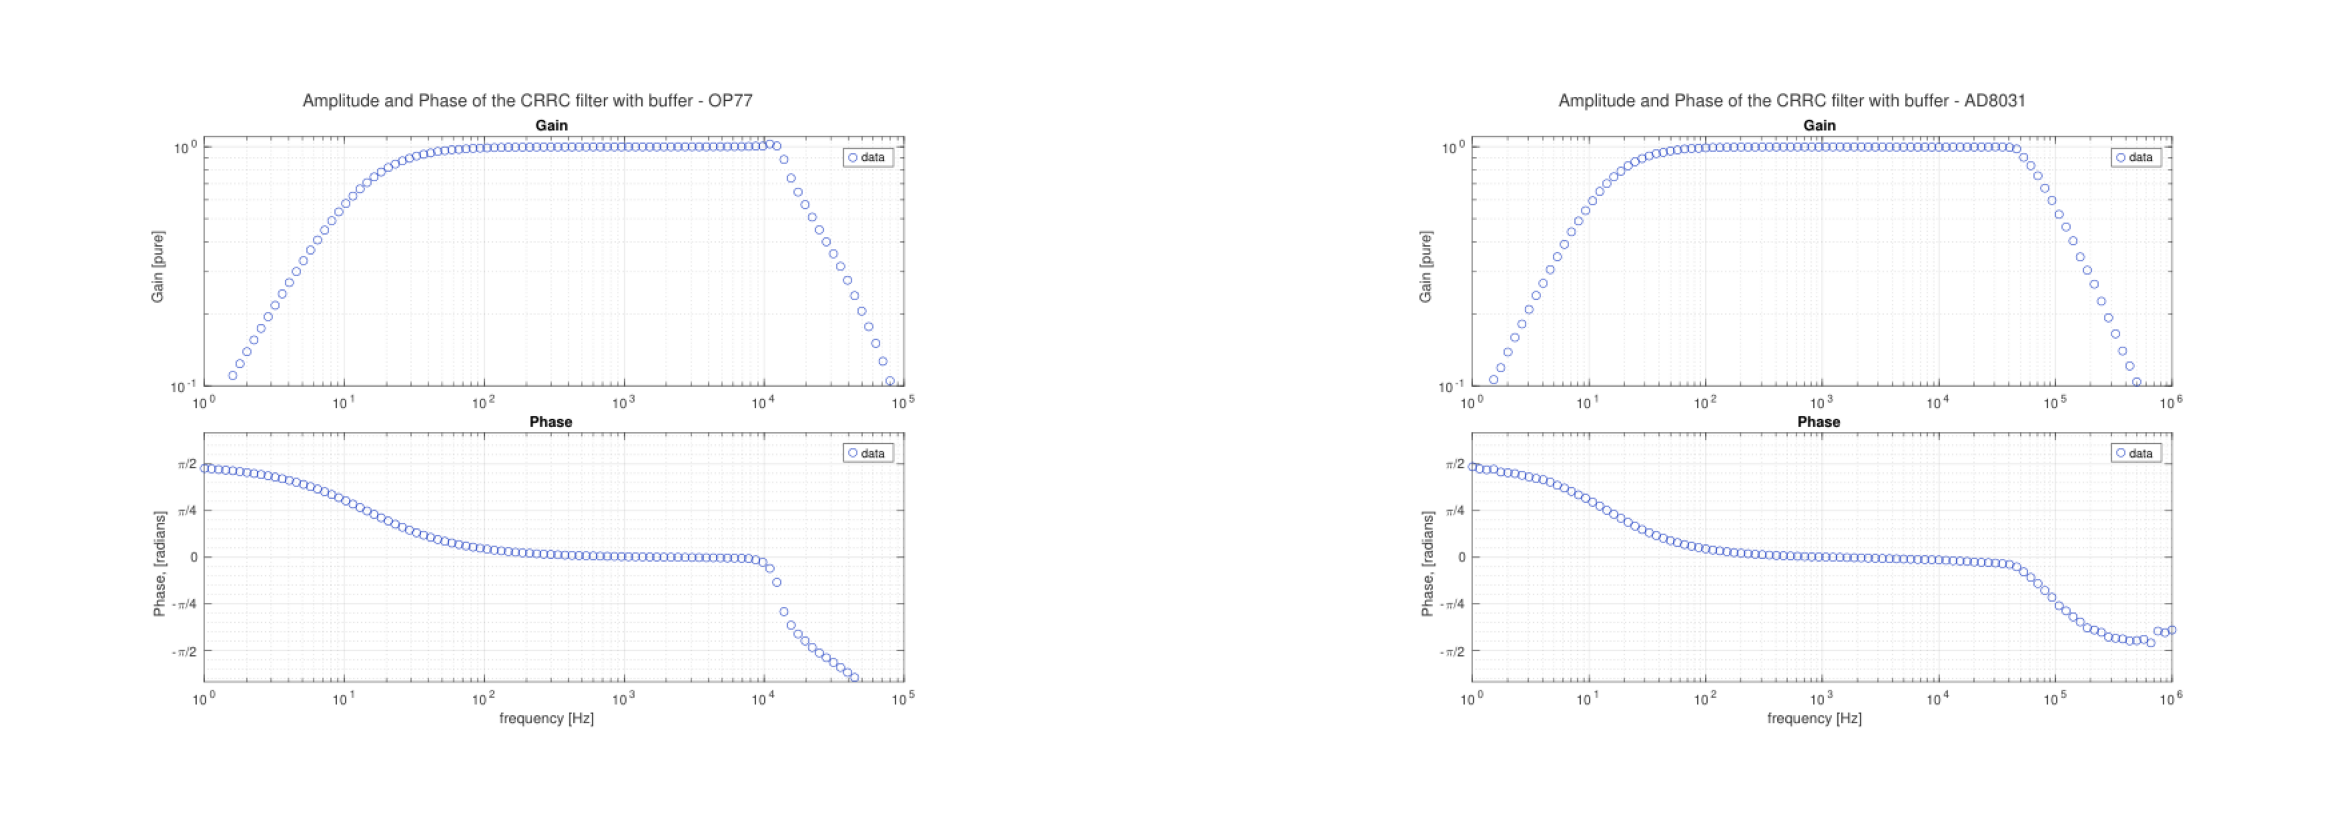

In [4]:
cols = 2
rows = 1
pdfList = ['Media/CRRCPlots/CRRCBufferOP77.pdf', 'Media/CRRCPlots/CRRCBufferAD8031.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)